Ex1:


In [1]:
import torch
import numpy as np

a = np.random.rand(6,2)
b = torch.rand(4,3)
c = torch.rand(3,4)

print(b)
#numpy to tensor
a1 = torch.from_numpy(a)
print('convert numpy array to tensor: ', a1)

#tensor reshape
a2 = torch.reshape(a1,(3,4))
print('tensor reshape: ', a2)


#transpose
b1 = torch.transpose(b, 0, 1)
print('transpose tensor: ', b1)

#addition
e = a2 +b1
print('sum tensor: ', e)

#element-wise
ew = e*c
print('element-wise: ', ew)

#multi
mm = torch.matmul(e, torch.transpose(c, 0, 1).double())
print('multi tensor: ', mm)

#tensor to numpy
print('tensor to numpy:', mm.numpy(), type(mm.numpy()))


tensor([[0.9745, 0.6298, 0.4410],
        [0.8647, 0.3691, 0.1644],
        [0.8491, 0.1623, 0.4048],
        [0.5959, 0.7787, 0.7830]])
convert numpy array to tensor:  tensor([[0.2328, 0.6654],
        [0.4617, 0.6351],
        [0.7945, 0.5300],
        [0.8351, 0.3053],
        [0.2562, 0.7938],
        [0.4588, 0.2391]], dtype=torch.float64)
tensor reshape:  tensor([[0.2328, 0.6654, 0.4617, 0.6351],
        [0.7945, 0.5300, 0.8351, 0.3053],
        [0.2562, 0.7938, 0.4588, 0.2391]], dtype=torch.float64)
transpose tensor:  tensor([[0.9745, 0.8647, 0.8491, 0.5959],
        [0.6298, 0.3691, 0.1623, 0.7787],
        [0.4410, 0.1644, 0.4048, 0.7830]])
sum tensor:  tensor([[1.2073, 1.5301, 1.3108, 1.2310],
        [1.4243, 0.8991, 0.9974, 1.0840],
        [0.6972, 0.9582, 0.8635, 1.0221]], dtype=torch.float64)
element-wise:  tensor([[0.6076, 0.7681, 1.0742, 0.4442],
        [1.1198, 0.8642, 0.9525, 0.9892],
        [0.4762, 0.8247, 0.3223, 0.3128]], dtype=torch.float64)
multi tensor:  ten

Ex2:





Epoch [10/200], Loss: 29111.1309
Epoch [20/200], Loss: 5957.0020
Epoch [30/200], Loss: 1448.6702
Epoch [40/200], Loss: 568.9078
Epoch [50/200], Loss: 395.3021
Epoch [60/200], Loss: 359.1364
Epoch [70/200], Loss: 349.7378
Epoch [80/200], Loss: 345.5676
Epoch [90/200], Loss: 342.4344
Epoch [100/200], Loss: 339.5227
Epoch [110/200], Loss: 336.6731
Epoch [120/200], Loss: 333.8548
Epoch [130/200], Loss: 331.0616
Epoch [140/200], Loss: 328.2921
Epoch [150/200], Loss: 325.5456
Epoch [160/200], Loss: 322.8223
Epoch [170/200], Loss: 320.1217
Epoch [180/200], Loss: 317.4437
Epoch [190/200], Loss: 314.7880
Epoch [200/200], Loss: 312.1546


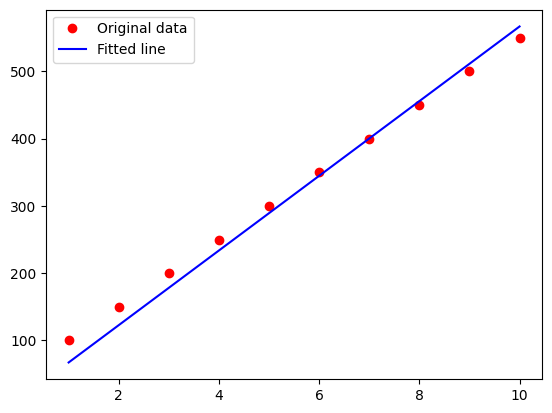

In [2]:
from torch import nn, optim
import matplotlib.pyplot as plt


class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.l1 = nn.Linear(1, 1)

    def forward(self, x):
        x = self.l1(x)
        return x

x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype=np.float32).reshape(-1, 1)
y = np.array([100, 150, 200, 250, 300, 350, 400, 450, 500, 550], dtype=np.float32).reshape(-1, 1)

x_tensor = torch.from_numpy(x)
y_tensor = torch.from_numpy(y)


model = SimpleNN()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)
num_epochs = 200
for epoch in range(num_epochs):
    outputs = model(x_tensor)
    loss = criterion(outputs, y_tensor)


    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


predicted = model(x_tensor).detach().numpy()
plt.plot(x, y, 'ro', label='Original data')
plt.plot(x, predicted, 'b', label='Fitted line')

plt.legend()
plt.show()



Ex3:

In [4]:
import torch
from torch import optim, nn
from torchvision import datasets, transforms, models
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader, Subset
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader


In [5]:

data_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p = 0.5),
    transforms.ToTensor()

])

training_data = datasets.FashionMNIST(
    root = "data",
    train = True,
    download = True,
    transform = data_transform
)

test_data = datasets.FashionMNIST(
    root = 'data',
    train = False,
    transform = data_transform
)



train_dataloader = DataLoader(training_data, batch_size = 64, shuffle = True)
test_data_loader = DataLoader(test_data, batch_size = 64, shuffle = True)


100%|██████████| 26421880/26421880 [00:11<00:00, 2245758.67it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 211637.61it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3794691.52it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 22077992.83it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



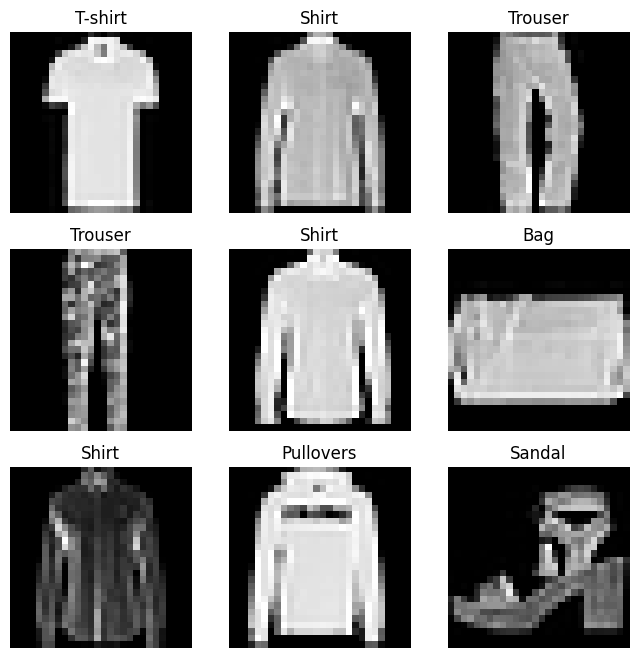

In [6]:
lables_map = {
    0: 'T-shirt',
    1: 'Trouser',
    2: 'Pullovers',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneakers',
    8: 'Bag',
    9: 'Ankle Boot',
}


figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
data_iter = iter(train_dataloader)
images, labels = next(data_iter)

for i in range(1, cols * rows + 1):
    img = images[i]
    label = labels[i].item()

    figure.add_subplot(rows, cols, i)
    plt.title(lables_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap='gray')

plt.show()


In [7]:
class SimpleCNN(nn.Module):
  def __init__(self):
    super(SimpleCNN, self).__init__()
    self.layer_stack = nn.Sequential(
      nn.Conv2d(1,5,3),
      nn.ReLU(),
      nn.Conv2d(5,10,3),
      nn.ReLU(),
      nn.Flatten(),
      nn.Linear(10 * 24 * 24, 120),
      nn.Linear(120, 84),
      nn.Linear(84, 10),
    )

  def forward(self, x):
    return self.layer_stack(x)

model = SimpleCNN()

In [8]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for batch_idx, (images, labels) in enumerate(train_dataloader):

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {running_loss / len(train_dataloader):.4f}')

Epoch [10/100], Loss: 0.2241
Epoch [20/100], Loss: 0.1708
Epoch [30/100], Loss: 0.1414
Epoch [40/100], Loss: 0.1262
Epoch [50/100], Loss: 0.1148
Epoch [60/100], Loss: 0.1056
Epoch [70/100], Loss: 0.0967
Epoch [80/100], Loss: 0.0905
Epoch [90/100], Loss: 0.0871
Epoch [100/100], Loss: 0.0838


In [11]:
model.eval()
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for _ in range(10)]
    n_class_samples = [0 for _ in range(10)]


    for images, labels in test_data_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

        for i in range(labels.size(0)):
            label = labels[i].item()
            pred = predicted[i].item()
            if label == pred:
                n_class_correct[label] += 1
            n_class_samples[label] += 1

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network: {acc:.2f} %')

    for i in range(10):
        if n_class_samples[i] > 0:
            acc = 100.0 * n_class_correct[i] / n_class_samples[i]
        else:
            acc = 0.0
        print(f'Accuracy of class {i}: {acc:.2f} %')



Accuracy of the network: 87.61 %
Accuracy of class 0: 80.40 %
Accuracy of class 1: 97.40 %
Accuracy of class 2: 85.40 %
Accuracy of class 3: 85.90 %
Accuracy of class 4: 81.50 %
Accuracy of class 5: 96.60 %
Accuracy of class 6: 63.40 %
Accuracy of class 7: 93.90 %
Accuracy of class 8: 97.10 %
Accuracy of class 9: 94.50 %


Ex4:

In [15]:
data_transform = transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.5, 0.5, 0.5], [0.25, 0.25, 0.25])
])

training_data = datasets.CIFAR10(
    root = "data",
    train = True,
    download = True,
    transform = data_transform
)

test_data = datasets.CIFAR10(
    root = 'data',
    train = False,
    transform = data_transform
)

#0: "airplane", 1: "car"
def get_car_plane_indices(dataset):
    return [i for i, (_, label) in enumerate(dataset) if label in [0, 1]]

car_plane_indices = get_car_plane_indices(training_data)
train_subset = Subset(training_data, car_plane_indices)


train_dataloader = DataLoader(train_subset, batch_size=64, shuffle=True)
car_plane_indices_test = get_car_plane_indices(test_data)
test_subset = Subset(test_data, car_plane_indices_test)
test_dataloader = DataLoader(test_subset, batch_size=64, shuffle=True)

model = models.resnet18(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 2)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

Files already downloaded and verified


In [ ]:
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for images, labels in train_dataloader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_dataloader):.4f}')

print("Finished Training!")

In [ ]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_data_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")

In [ ]:
torch.save(model.state_dict(), 'resnet18.pth')
print("Model saved successfully!")

In [ ]:
model.load_state_dict(torch.load('resnet18.pth'))
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in test_data_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Test Accuracy: {accuracy:.2f}%')
